In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [12]:
df = pd.read_csv("raw_data/bank_test.csv")
display(df)

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40000,26.0,self-employed,single,tertiary,Porto,no,-101.0,no,yes,cellular,29,jan,172,1.0,-1,0.0,unknown
1,40001,47.0,technician,married,secondary,NaN,no,1167.0,yes,no,cellular,2,feb,139,3.0,73,2.0,success
2,40002,35.0,self-employed,married,tertiary,NaN,no,2427.0,no,no,cellular,12,jul,210,3.0,158,7.0,other
3,40003,54.0,technician,divorced,secondary,NaN,no,NaN,no,no,cellular,30,jan,86,1.0,-1,0.0,unknown
4,40004,27.0,blue-collar,single,secondary,Braga,no,-208.0,yes,n,unknown,21,may,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,45206,38.0,administrator,married,secondary,NaN,no,1767.0,yes,no,cellular,12,nov,893,7.0,-1,0.0,unknown
5207,45207,39.0,housemaid,married,primary,Lisboa,no,562.0,no,no,cellular,12,aug,234,2.0,-1,0.0,unknown
5208,45208,46.0,technician,married,secondary,Amadora,no,0.0,no,no,unknown,20,jun,625,1.0,-1,0.0,unknown
5209,45209,NaN,technician,single,secondary,Braga,no,1195.0,yes,no,cellular,19,nov,187,6.0,188,9.0,failure


###Análise do Dataframe

In [13]:
df.info()
#id->feito: dropado (ok)
#age->feito: remoção dos outliers, remoção das crianças (outliers lower_range)
#falta: dados ausentes
#job->falta: dados ausentes e unknowns, get_dummies()
#marital-> falta: dados ausentes, get_dummies()
#education-> falta: unknowns, get_dummies()
#location->feito: removida (50% dos dados ausentes) (ok)
#default->feito: passado para números (ok)
#balance->falta: dados ausentes, remoção dos outliers
#housing->feito: passado para números (ok)
#loan->feito: passado para números (ok)
#contact->falta: dados ausentes, unknowns, get_dummies()
#day->falta: dropar coluna? get_dummies()? unir com months?
#month->feito: passado para números
#falta: get_dummies()? unir com dias?
#duration->feito: remover outliers (ok)
#campaign->falta: dados faltantes, remover outliers
#pdays->falta: remover outliers, transformar em categórica?
#previous->falta: dados ausentes, remover outliers, transformar em categórica?
#poutcome->falta: unknowns, get_dummies()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         5211 non-null   int64  
 1   age        5045 non-null   float64
 2   job        5055 non-null   object 
 3   marital    5192 non-null   object 
 4   education  5211 non-null   object 
 5   location   2449 non-null   object 
 6   default    5211 non-null   object 
 7   balance    4964 non-null   float64
 8   housing    5211 non-null   object 
 9   loan       5211 non-null   object 
 10  contact    5121 non-null   object 
 11  day        5211 non-null   int64  
 12  month      5211 non-null   object 
 13  duration   5211 non-null   int64  
 14  campaign   5022 non-null   float64
 15  pdays      5211 non-null   int64  
 16  previous   5172 non-null   float64
 17  poutcome   5211 non-null   object 
dtypes: float64(4), int64(4), object(10)
memory usage: 732.9+ KB


<h4>Analise breve dos dados do conjunto de dados</h4>
<p>Ao observar a descrição do conjunto de dados abaixo, temos alguns casos um tanto quanto absurdos. Por exemplo: pessoas com oito anos de idade e 150 anos.</p>

In [14]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,5211.000000,5045.000000,4964.000000,5211.000000,5211.000000,5022.000000,5211.000000,5172.000000
mean,42605.000000,41.110803,1381.651088,15.700249,470.182115,2.847073,38.924583,0.538670
std,1504.430457,10.834867,3147.075226,8.277734,4013.509928,3.469919,98.843609,1.956363
min,40000.000000,8.000000,-2093.000000,1.000000,-20.000000,1.000000,-1.000000,0.000000
25%,41302.500000,33.000000,69.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,42605.000000,39.000000,430.000000,16.000000,176.000000,2.000000,-1.000000,0.000000
75%,43907.500000,49.000000,1451.000000,21.000000,312.000000,3.000000,-1.000000,0.000000
max,45210.000000,150.000000,71188.000000,31.000000,75000.000000,63.000000,842.000000,51.000000


In [15]:
df.duplicated().sum() #o dataframe não apresenta duplicadas

np.int64(0)

In [16]:
df.isna().sum()
#que apresentam dados faltantes: age, job, marital, location (vai ser dropada), balance, contact, campaign, previous
#que apresentam dados unknown: job, education, contact, poutcome

id              0
age           166
job           156
marital        19
education       0
location     2762
default         0
balance       247
housing         0
loan            0
contact        90
day             0
month           0
duration        0
campaign      189
pdays           0
previous       39
poutcome        0
dtype: int64

In [17]:
for col in df.columns:
  print(col.upper())
  print(df[col].unique(), df[col].dtype, "\n")

ID
[40000 40001 40002 ... 45208 45209 45210] int64 

AGE
[ 26.  47.  35.  54.  27.  40.  nan  48.  33.  37.  61.  45.  32.  46.
  43.  31.  34.  53.  38.  60.  50.  59.  39.  19.  30.  49.  56.  51.
  44.  28.  25.  36.  52.  65.  29.  78.  41.  58.  42.  57.  23.  55.
  24.  73.  80.  62.  67.  82.  71. 150.  70.  63.  74.  64.  66.  72.
  22.  83.  76.  68.  77.  69.  81.  21.  18.  75.   8.  79.  20.  87.
  86.] float64 

JOB
['self-employed' 'technician' 'blue-collar' 'services' 'management'
 'unemployed' 'admin.' 'entrepreneur' nan 'student' 'administrator'
 'retired' 'housemaid' 'unknown'] object 

MARITAL
['single' 'married' 'divorced' nan] object 

EDUCATION
['tertiary' 'secondary' 'primary' 'unknown'] object 

LOCATION
['Porto' nan 'Braga' 'Lisboa' 'Amadora' 'Faro' 'Coimbra'] object 

DEFAULT
['no' 'yes'] object 

BALANCE
[-101. 1167. 2427. ... 3463. 3119. 1767.] float64 

HOUSING
['no' 'yes'] object 

LOAN
['yes' 'no' 'n' 'y'] object 

CONTACT
['cellular' 'unknown' 'telephone

In [18]:
df.dtypes

id             int64
age          float64
job           object
marital       object
education     object
location      object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign     float64
pdays          int64
previous     float64
poutcome      object
dtype: object

###Plotagem de gráficos (valores absolutos)

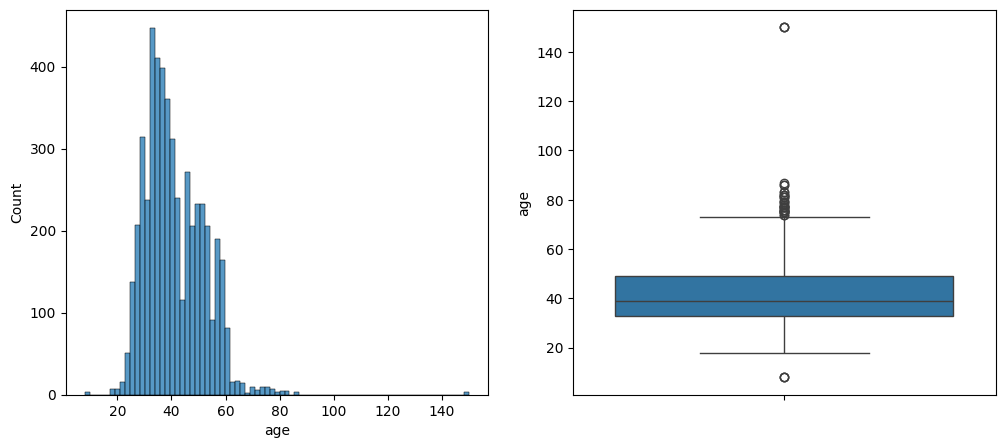

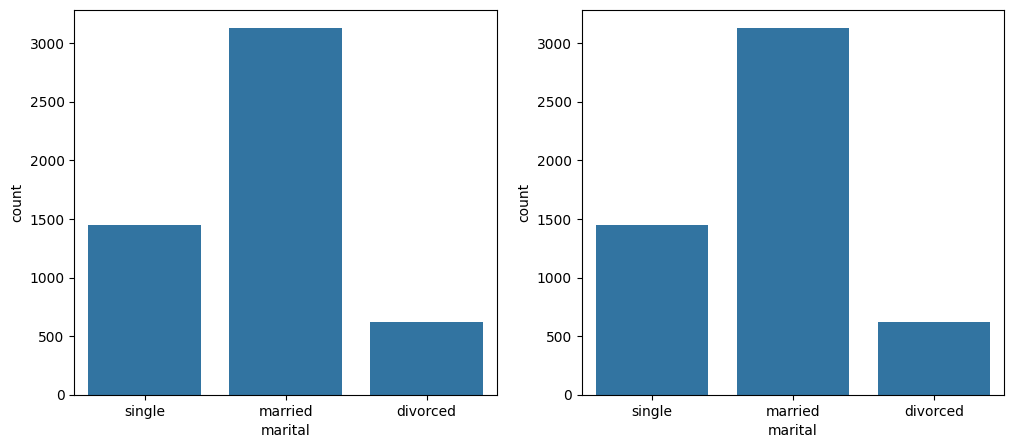

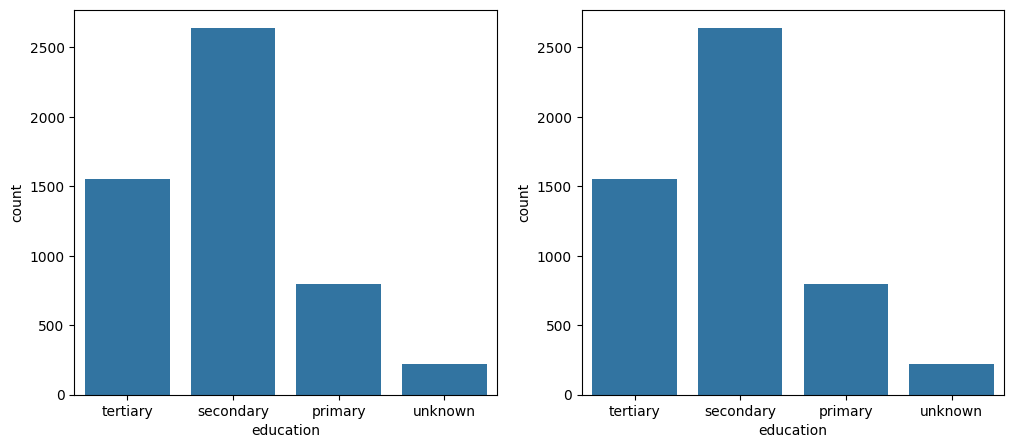

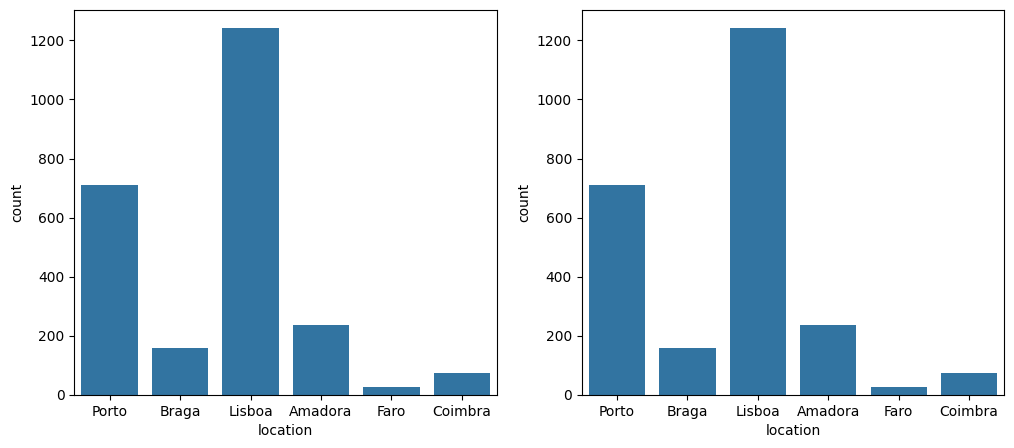

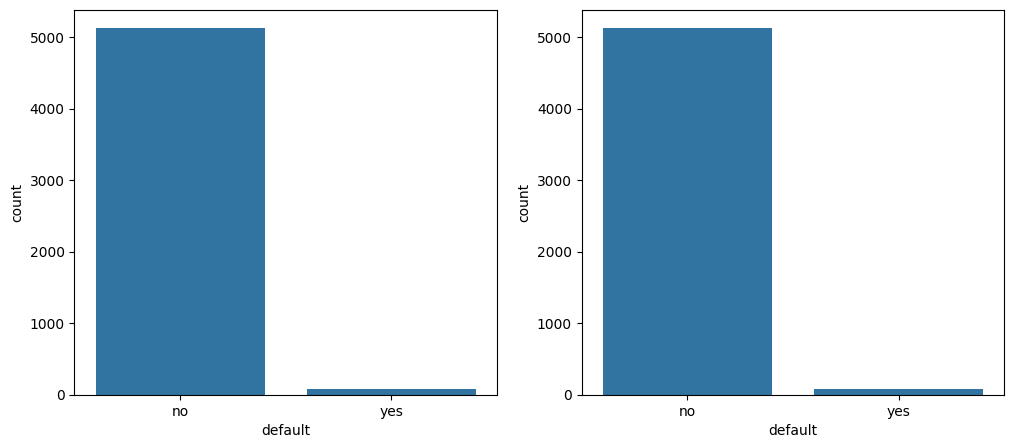

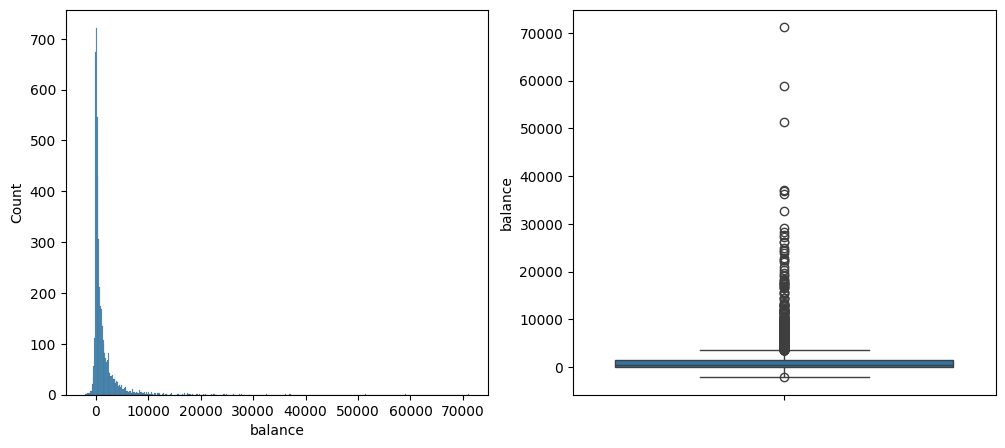

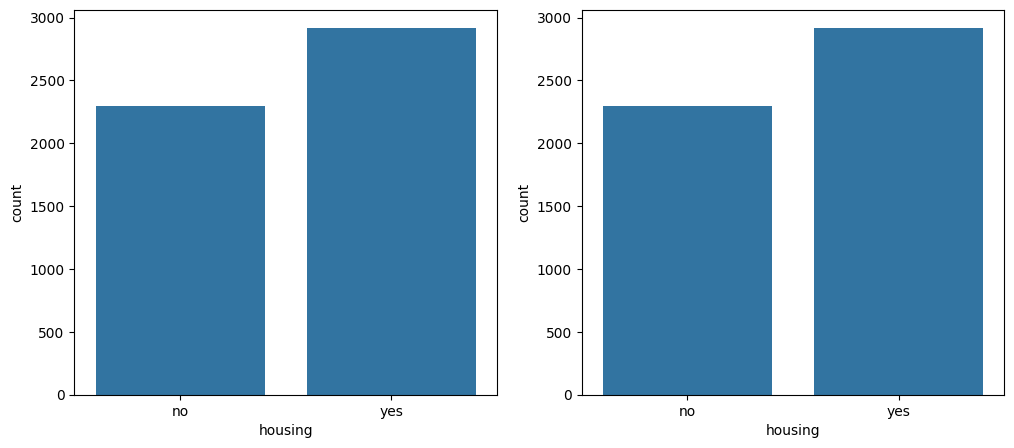

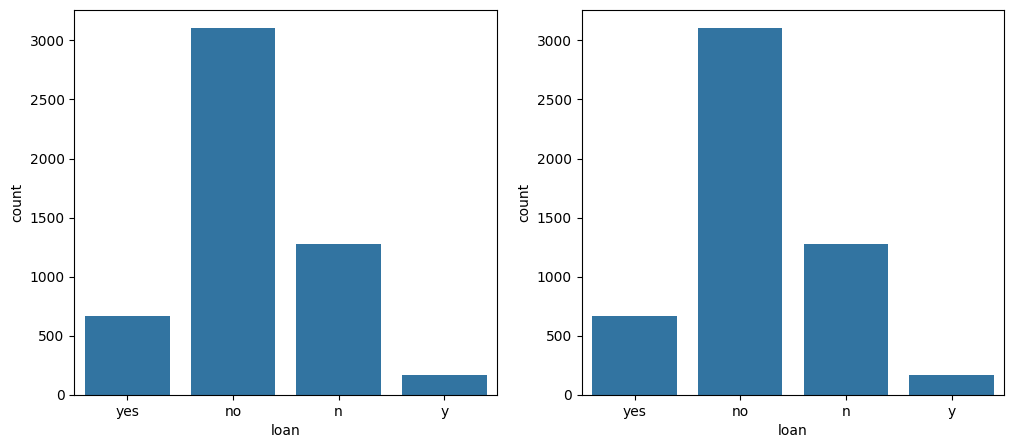

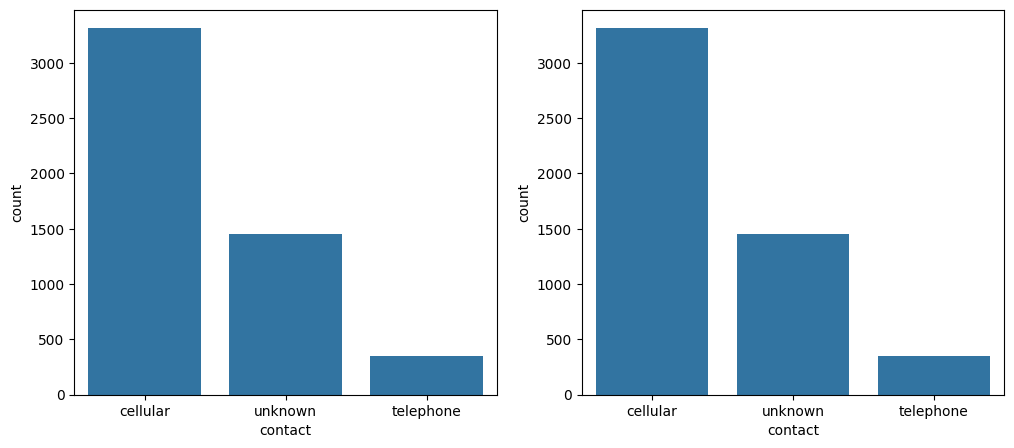

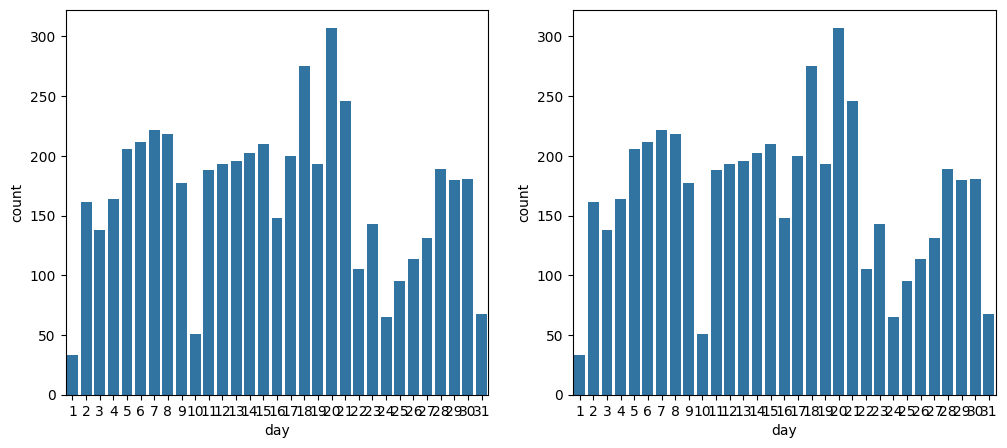

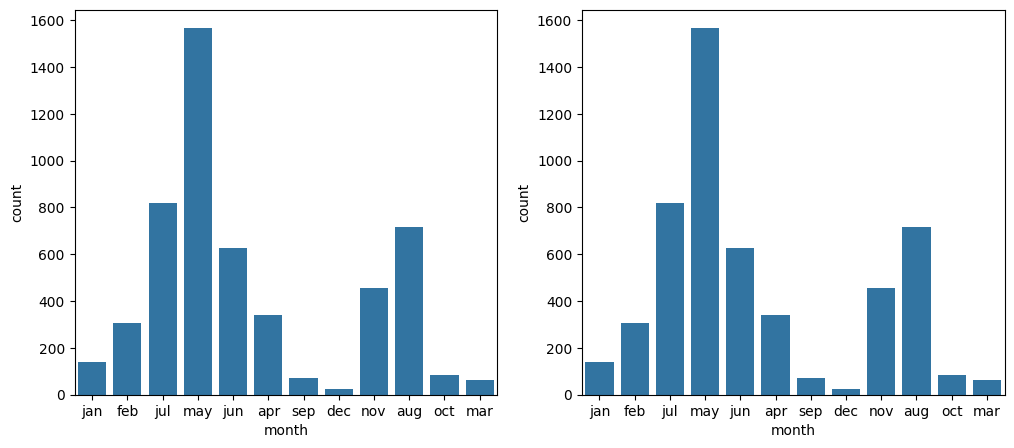

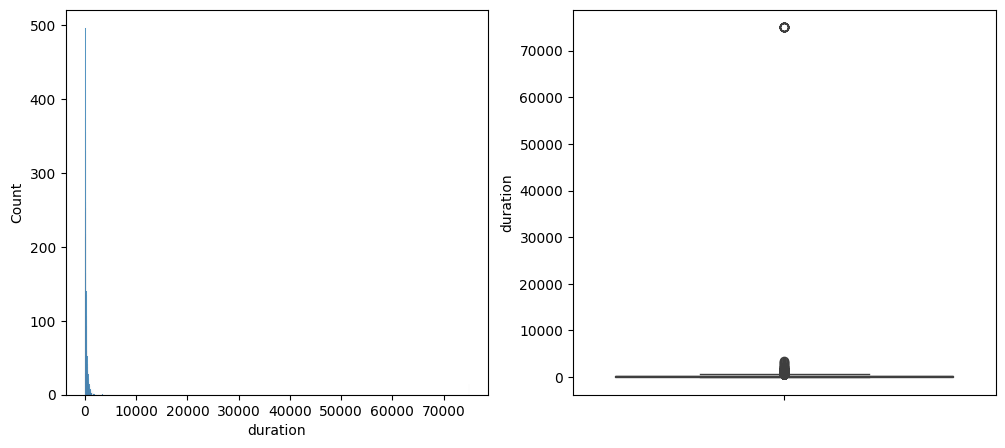

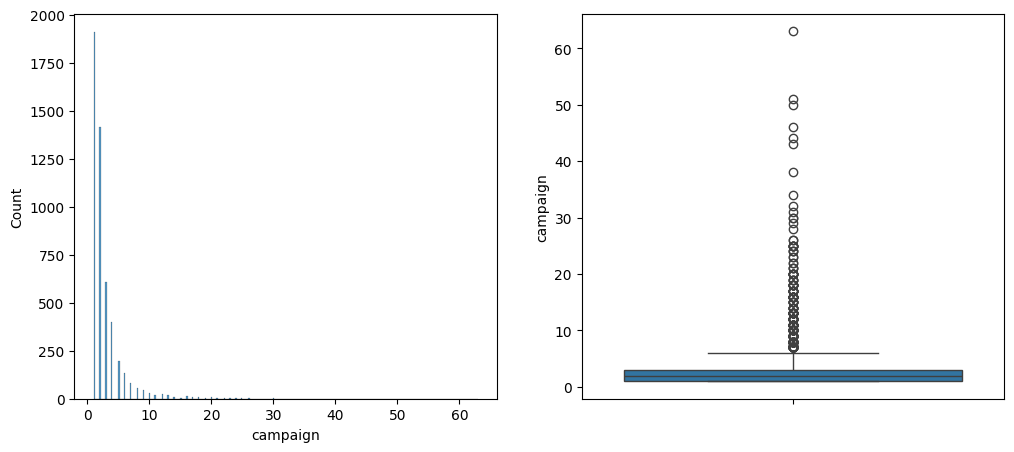

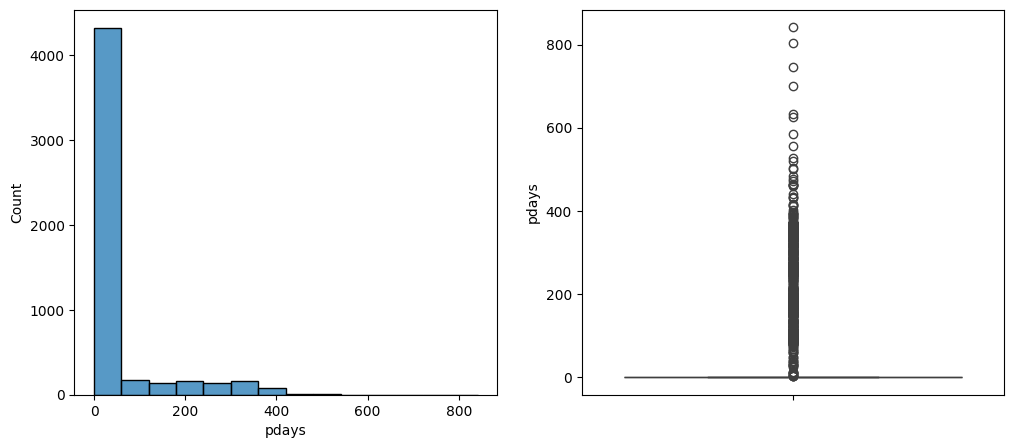

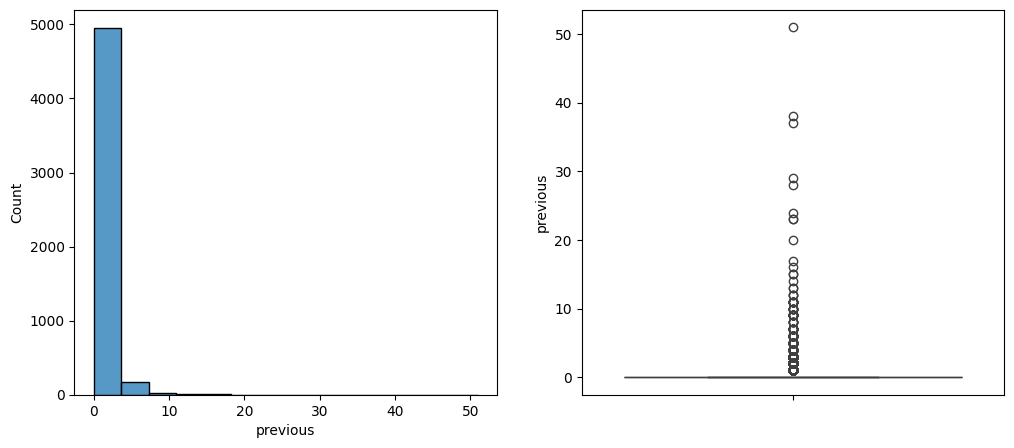

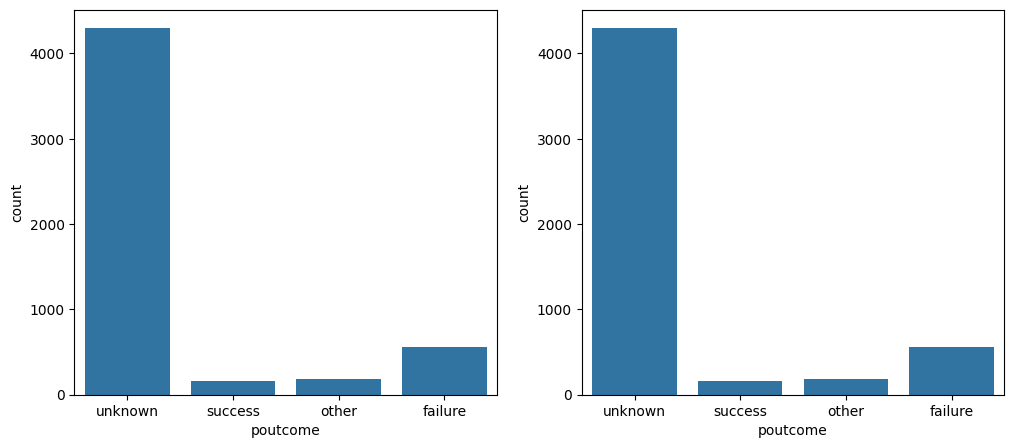

In [19]:
#plotagem de diversos gráficos para a análise exploratória
categoricas = np.array(("marital","education","day","month","location","default","housing","loan","contact","poutcome"))
numericas = np.array(("age","balance","duration","campaign","pdays","previous"))

for feature in (df.columns):
  if feature in categoricas:
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.countplot(data = df, x = feature)
    plt.subplot(1,2,2)
    sns.countplot(data = df, x = feature)
    plt.show()
  elif feature in numericas:
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.histplot(data = df, x = feature)
    plt.subplot(1,2,2)
    sns.boxplot(data = df, y = feature)
    plt.show()

###Análise de Relações entre Features

<Axes: xlabel='balance', ylabel='job'>

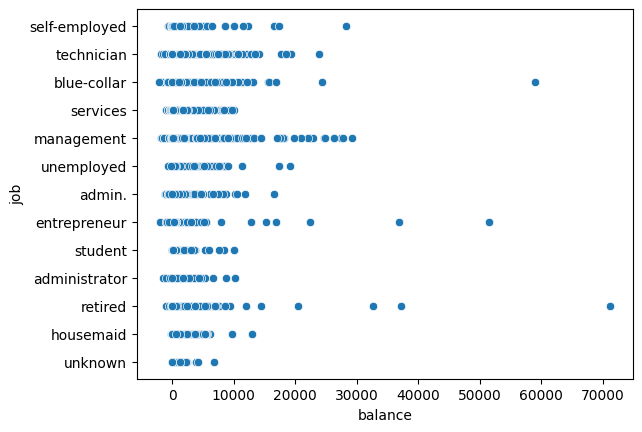

In [20]:
sns.scatterplot(data=df, x="balance", y="job") #scatterplot do balanço por trabalho (análise)

[]

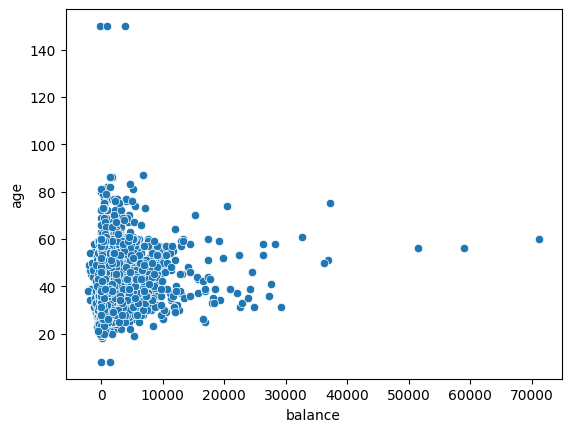

In [21]:
sns.scatterplot(data=df, x="balance", y="age") #scatterplot do balanço por age (análise)
#mais ricos são os indíviduos 30 e 60
plt.plot()